# 인공지능과 가위바위보 하기


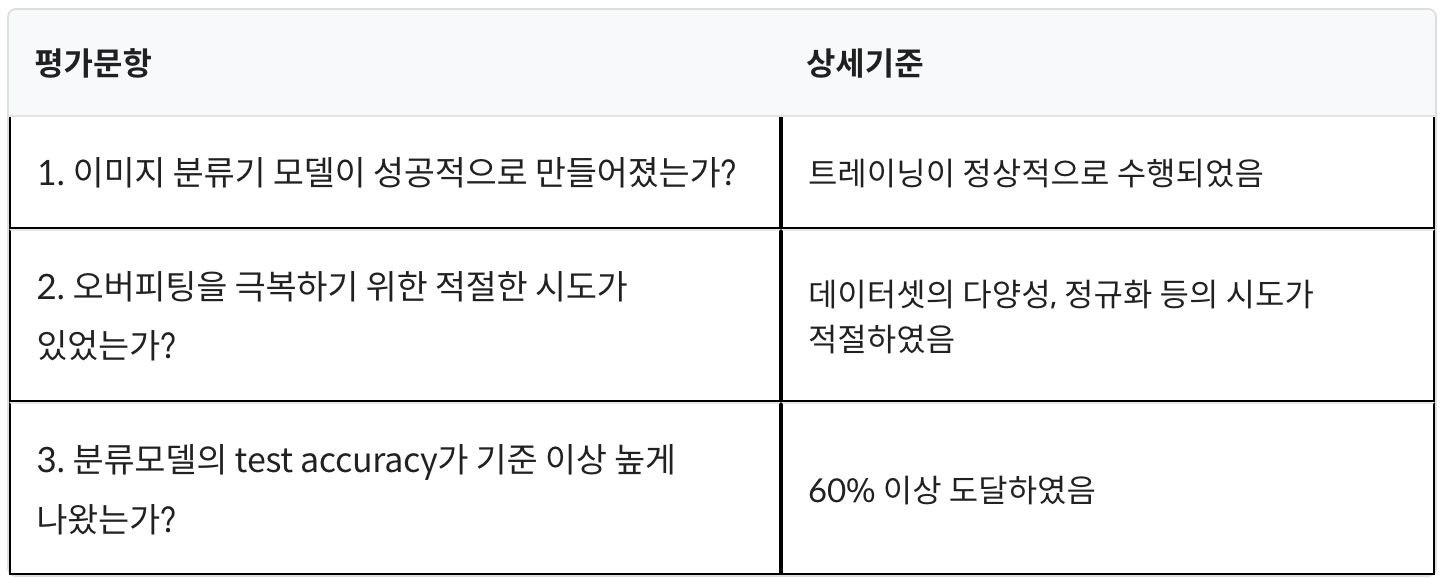

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.0
1.21.6


# 1. 데이터 불러오기 + Resize 하기

In [22]:
from PIL import Image
import glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/paper 3'
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/Rock 3'
resize_images(image_dir_path)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/Scissor 3'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [23]:
import numpy as np

def load_data100(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor 3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock 3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper 3/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05'
(x100_train, y100_train)=load_data100(image_dir_path)
x100_train_norm = x100_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x100_train.shape))
print("y_train shape: {}".format(y100_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


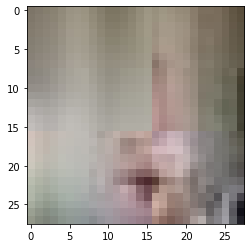

In [24]:
# 이미지 확인하기

import matplotlib.pyplot as plt

plt.imshow(x100_train[10])
print('라벨: ', y100_train[10])

# 2. 딥러닝 네트워크 설계하기


In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

# 3. 딥러닝 네트워크 학습시키기

In [38]:
# 정규화의 영향을 확인하기 위해 정규화를 시키지 않은 데이터를 넣어줌

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x100_train, y100_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 13ms/step - loss: 16.6304 - accuracy: 0.3433
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 5.2191 - accuracy: 0.3100
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.8935 - accuracy: 0.4100
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0808 - accuracy: 0.5833
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.7467
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8233
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2833 - accuracy: 0.8733
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9367
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.9700
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1035 - accuracy: 0.9767


# 4. 얼마나 잘 만들었는지 확인하기 (테스트)

In [39]:
# 테스트 데이터 resize

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/paper'
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/rock'
resize_images(image_dir_path)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/scissor'
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [41]:
# 테스트 데이터 로드

def load_data100t(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test'
(x100_test, y100_test)=load_data100t(image_dir_path)
x100_test_norm = x100_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x100_test.shape))
print("y_train shape: {}".format(y100_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [51]:
test_loss, test_accuracy = model.evaluate(x100_test, y100_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 92.3372 - accuracy: 0.3433 - 139ms/epoch - 14ms/step
test_loss: 92.33723449707031 
test_accuracy: 0.34333333373069763


model.predict() 결과 :  [1.4154856e-02 6.7745309e-10 9.8584521e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


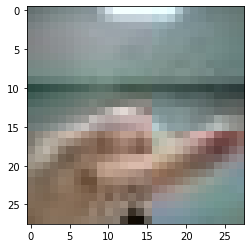

In [46]:
# 잘못 추론한 데이터 확인

predicted_result = model.predict(x100_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y100_test[idx])

plt.imshow(x100_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [8.2687116e-01 5.6709825e-05 1.7307219e-01]
라벨: 2, 예측결과: 0


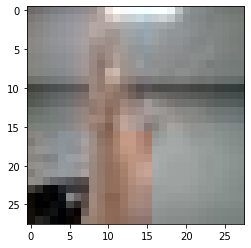

예측확률분포: [0.9760701  0.00557891 0.01835097]
라벨: 2, 예측결과: 0


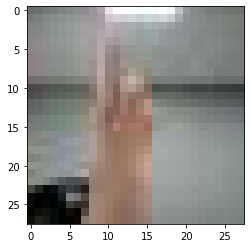

예측확률분포: [9.9488336e-01 2.3520929e-08 5.1165679e-03]
라벨: 2, 예측결과: 0


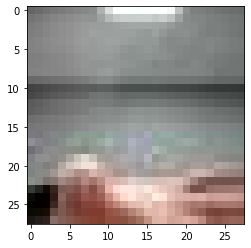

예측확률분포: [1.7374707e-02 8.1549297e-06 9.8261708e-01]
라벨: 0, 예측결과: 2


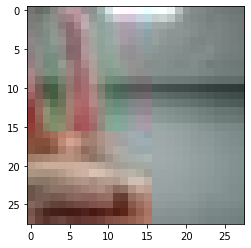

예측확률분포: [2.9113317e-01 7.8833932e-07 7.0886612e-01]
라벨: 0, 예측결과: 2


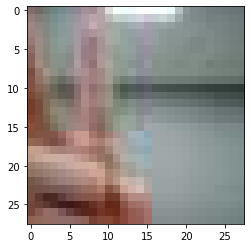

In [49]:
# 틀린 경우 살펴보기 2

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y100_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y100_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x100_test[n], cmap=plt.cm.binary)
    plt.show()

# 5. 더 좋은 네트워크 만들어보기

In [52]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x100_train_norm, y100_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x100_test_norm, y100_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [53]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_channel_3=128
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x100_train_norm, y100_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x100_test_norm, y100_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 1, 1, 128)       

In [56]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_channel_3=256
n_dense=256
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x100_train_norm, y100_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x100_test_norm, y100_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 3, 3, 256)         147712    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 256)       

## 1차 시도 
- train: 직접 찍은 사진 각 100장씩 총 300장
- test: 호원님이 찍은 사진 각 100장씩 총 300장 
- 모델 설계: 채널1(16),  채널2(32), dense(32), epoch(10) 
- 학습 결과: 35% 

## 2차 시도 
- train: 직접 찍은 사진 각 100장씩 총 300장
- test: 호원님이 찍은 사진 각 100장씩 총 300장 
- 모델 설계: 채널1(32),  채널2(64), dense(64), epoch(10) 
- 학습 결과: 40% 

## 3차 시도
- train: 직접 찍은 사진 각 100장씩 총 300장
- test: 호원님이 찍은 사진 각 100장씩 총 300장 
- 모델 설계: 채널1(32),  채널2(64), 채널3(128), dense(128), epoch(10) 
- 학습 결과: 54% 

## 결과 
- 모델을 수정해보아도 train data 셋이 작아서 학습이 제대로 되지 않는 것 같다. 


## Agit 및 조원분들의 데이터 합쳐서 다시 학습함

In [58]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/paper'
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/Rock'
resize_images(image_dir_path)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/Scissor'
resize_images(image_dir_path)

1471  images to be resized.
1471  images resized.
1471  images to be resized.
1471  images resized.
1471  images to be resized.
1471  images resized.


In [121]:
import numpy as np

def load_data(img_path, number_of_data=4413):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4413 입니다.
x_train shape: (4413, 28, 28, 3)
y_train shape: (4413,)


In [62]:
# 테스트 데이터 resize

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/paper 2'
resize_images(image_dir_path)

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/Rock 2'
resize_images(image_dir_path)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test/Scissor 2'
resize_images(image_dir_path)

300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.


In [122]:
# 테스트 데이터 로드

def load_datat(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor 2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock 2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper 2/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05/test'
(x_test, y_test)=load_datat(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 900 입니다.
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


In [124]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_92 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 3200)              0         
                                                                 
 dense_68 (Dense)            (None, 128)             

## 4차 시도
- train: agit와 조원님들의 사진 각 1471장씩 총 4413장
- test: 직접 찍은 사진 각 300장씩 총 900장 
- 모델 설계: 채널1(64),  채널2(128), dense(128), epoch(10) 
- 학습 결과: 40% 

## 결과 
- validation set 을 넣지 않은 경우 과적합이 일어나는 것을 확인할 수 있다. 

In [125]:
from sklearn.model_selection import train_test_split

test_x, val_x, test_y, val_y = train_test_split(x_test_norm, y_test,
                                                  test_size=0.3,
                                                  shuffle=True, 
                                                  random_state=9082)

In [126]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=512
n_channel_2=1024
n_dense=1024
n_train_epoch=50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# early stop
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch, validation_data = (val_x,val_y), callbacks=[es])

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_93 (Conv2D)          (None, 26, 26, 512)       14336     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 13, 13, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_94 (Conv2D)          (None, 11, 11, 1024)      4719616   
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 5, 5, 1024)       0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 25600)             0         
                                                                 
 dense_70 (Dense)            (None, 1024)            

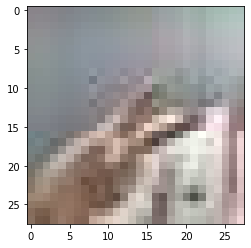

In [85]:
plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()

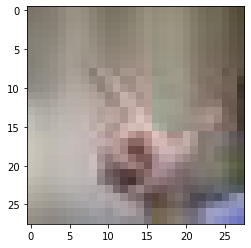

In [87]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

## 5차 시도
- train: agit와 조원님들의 사진 각 1471장씩 총 4413장 중 90%
- test: agit와 조원님들의 사진 각 1471장씩 총 4413장 중 10% 
- validation: 직접 찍은 사진 각 300장씩 총 900장 70% 
- 모델 설계: 채널1(64),  채널2(128), dense(128), epoch(10) 
- 학습 결과: 33% 

## 결과
- 학습은 잘되었지만 테스트 데이터셋에서 결과가 좋지 않았다.

## 6차 시도
- train: agit와 조원님들의 사진 각 1471장씩 총 4413장
- test: 직접 찍은 사진 각 300장씩 총 900장 30% 
- validation: 직접 찍은 사진 각 300장씩 총 900장 70% 
- 모델 설계: 채널1(64),  채널2(128), dense(128), epoch(10) 
- 학습 결과: 40% 

## 결과
- 학습 데이터의 양을 총 4000개 이상으로 늘렸지만 test셋과 train셋의 배경등이 많이 다르다보니 여전히 학습을 제대로 하지 못하는 결과가 나온 것 같다. 


In [89]:
# 데이터를 모두 합친 후 전체 데이터 셋 내부에서 train과 validation, test 를 나눠서 진행함
import numpy as np

def load_data(img_path, number_of_data=4413):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 05'
(x_data, y_data)=load_data(image_dir_path)
x_data_norm = x_data/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_data.shape))
print("y_train shape: {}".format(y_data.shape))

학습데이터(x_train)의 이미지 개수는 4413 입니다.
x_train shape: (4413, 28, 28, 3)
y_train shape: (4413,)


In [106]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_data_norm, y_data,
                                                  test_size=0.15,
                                                  shuffle=True, 
                                                  random_state=9082)

x_train, val_x, y_train, val_y = train_test_split(train_x, train_y,
                                                  test_size=0.15,
                                                  shuffle=True, 
                                                  random_state=9082)

In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=256
#n_channel_3=512
n_dense=256
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
# model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# early stop
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch, validation_data = (val_x,val_y),callbacks=[es])

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_x, test_y, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 11, 11, 256)       147712    
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 6400)              0         
                                                                 
 dense_52 (Dense)            (None, 256)             

## 7차 시도
- train: 전체 데이터셋 5313장 중 75% 
- validation: 전체 데이터셋 5313장 중 15% 
- test: 전체 데이터셋 5313장 중 15% 
- 모델 설계: 채널1(64),  채널2(128), dense(128), epoch(10) 
- 학습 결과: 96.5% 

## 결과
- 데이터를 섞어서 학습시킨후 테스트를 하면 모델을 복잡하게 하지 않아도 학습 정확도가 96퍼센트 이상 나오는 것을 확인할 수 있었다. 

## 회고
- 이미지 처리를 수동으로 처리하는 시절에 실험 환경에 따라 결과에 영향을 받는 경험을 했었는데, 이번 노드를 진행하면서 그 때의 기억이 떠올랐다. 
- 이론적으로는 학습이 잘된 모델은 내가 찍었던 데이터셋으로 학습한 후 다른 분들의 데이터에 테스트를 했을 때에도 같은 결과를 얻어야 할 것 같은데, 실제 진행해보니 학습할 땐 validation 셋에서도 높은 정확도를 보였지만 다른 분들의 데이터로 테스트를 하게 되면 33% 즉 찍는 것과 비슷한 확률 근처의 결과를 얻었다. 이는 내가 만든 모델(노드에 나온 기본 모델에서 레이어 변수를 조절)이 학습데이터와 다른 환경에서 확보한 데이터의 경우에는 적용할 수 없다는 것을 보여주는 것 같다. 이 부분은 추후 학습을 진행하면서 발전이 가능한 것인지 아니면 인공지능이 가지는 한계인지 궁금하다.  
- 앞선 노드들에서 했던 것 처럼 전체 데이터를 섞어서 테스트 셋과 학습데이터를 나누는 방법으로 학습과 추론을 진행했을 때는 학습이 잘 진행되었다. 

